# Multiple Linear Regression
## Boom Bikes case study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


Goal is to identify factors on which the demand for these shared bikes depends. Specifically, the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands.

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [673]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [674]:
import numpy as np
import pandas as pd

In [675]:
boombikes = pd.read_csv("day.csv")

In [676]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [677]:
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [569]:
boombikes.shape

(730, 16)

In [570]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


None of the columns have null values, so missing value handling not required

In [571]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data cleaning and handling null

From the given dataset the instant columns gives a sequence to record, which doesn't effect the overall
bike selection by users, so this can be dropped from the dataset.


In [572]:
boombikes.drop('instant', axis=1, inplace=True)

Goal is to identify factors on which the demand for these shared bikes depends. 
Specifically, the demand for these shared bikes in the American market. 
Not specifically talking about casual or registered bike booking. 
So dropping these columns casual & registered as well from the dataset. The overall prediction will be on cnt feature.

In [573]:
boombikes.drop(['casual', 'registered'], axis=1, inplace=True)

mnth, yr columns gives respective month & year of a record, original date is not required for analysis. 
so dropping dteday column also.

In [574]:
boombikes.drop(['dteday'], axis=1, inplace=True)

In [575]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Replacing the season & weathersit values with their original categorical values

In [576]:
boombikes['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

In [577]:
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [578]:
boombikes['weathersit'].replace({1:'Partly_cloudy', 2:'Mist_cloudy', 3:'low_rain', 4:'heavy_rain'},inplace=True)

In [579]:
boombikes['weathersit'].value_counts()

Partly_cloudy    463
Mist_cloudy      246
low_rain          21
Name: weathersit, dtype: int64

In [580]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [581]:
boombikes['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',
                         8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
boombikes['weekday'].replace({0:'Sunday',1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [582]:
boombikes.weekday.value_counts().sort_index()

Friday       104
Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

Next we will be creating the dummy variables for season and weathersit

## Step 3: Visualising the Data

Let's now spend some time doing - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

In [ ]:
sns.pairplot(boombikes)

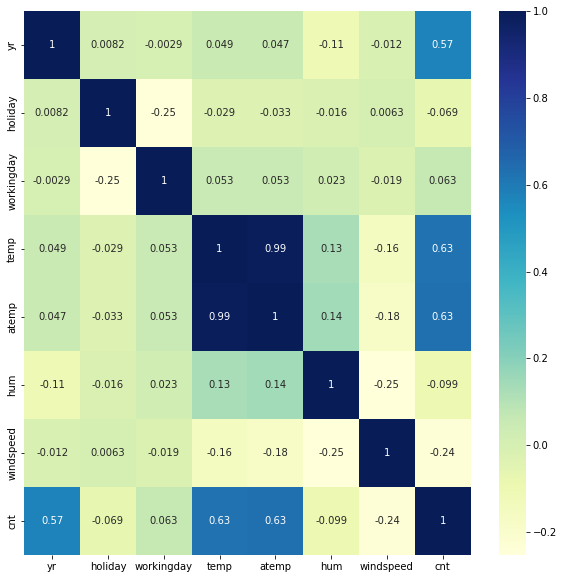

In [584]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(boombikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the heatmap, we can see temp & atemp are highly correlated, so let's remove one variable temp from the dataset

In [585]:
boombikes.drop('temp', axis=1, inplace=True)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [586]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,1600


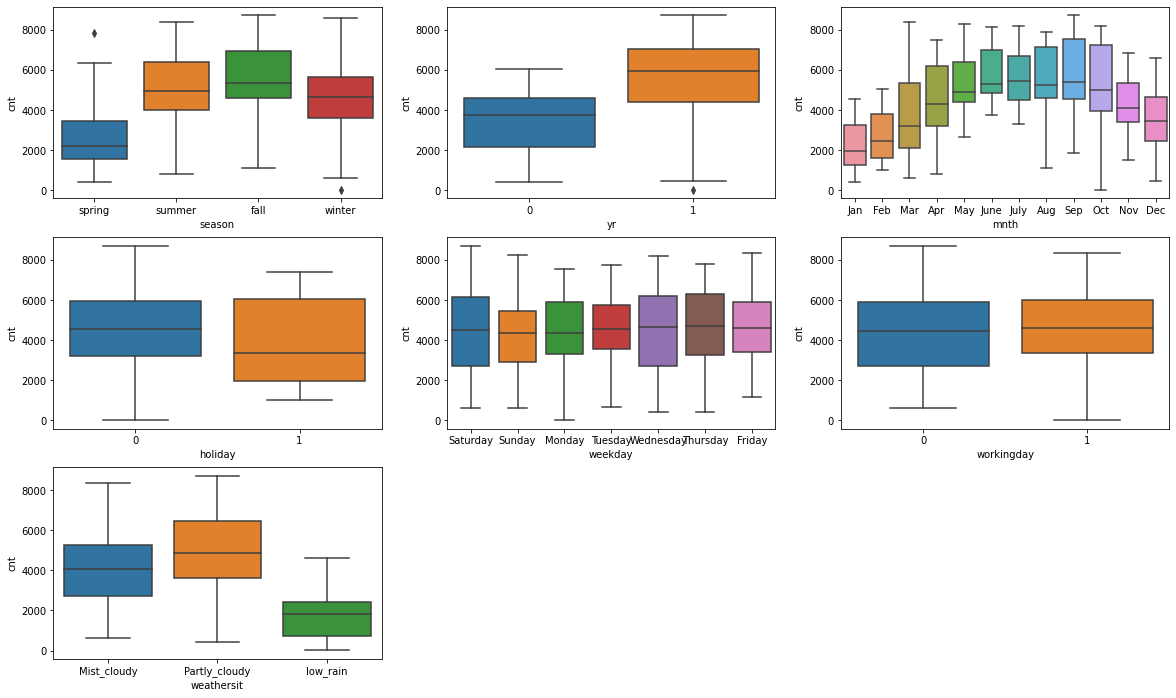

In [587]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()


Observations from Data visualization:

    - During summer, fall the number of rental bike users are more 
    - Number of users are increased from 2018 to 2019 
    - During mid of year the users are more ( april to october)
    

In [588]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,1600


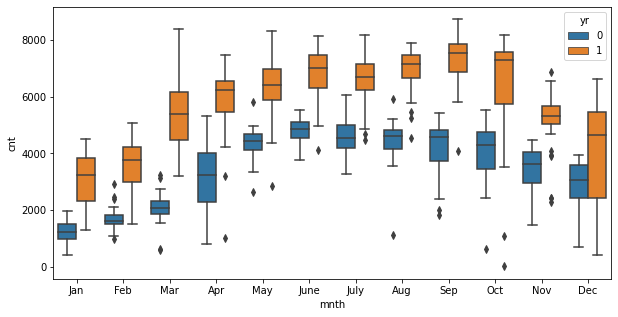

In [589]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = boombikes)
plt.show()

## Step 3: Data Preparation

#### let's add dummy variables

The variables season, weathersit, weekday, mnth have multiple levels. 
We need to convert these levels into integer as well. For this, we will use something called dummy variables.

In [590]:
seasonType = pd.get_dummies(boombikes['season'], drop_first=True)

# Check what the dataset 'status' looks like
seasonType.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [591]:
weathertype = pd.get_dummies(boombikes['weathersit'], drop_first=True)

# Check what the dataset 'status' looks like
weathertype.head()

,Partly_cloudy,low_rain
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [592]:
week = pd.get_dummies(boombikes['weekday'], drop_first=True)

# Check what the dataset 'status' looks like
week.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [593]:
mnthname = pd.get_dummies(boombikes['mnth'], drop_first=True)

# Check what the dataset 'status' looks like
mnthname.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [594]:
boombikes = pd.concat([boombikes, seasonType,weathertype, week,mnthname ], axis=1)

In [595]:
# Check the boombikes dataframe now

boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [596]:
# Drop 'spring', 'mnth', 'weekday', 'weathersit' as we have created the dummies for it

boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Partly_cloudy', 'low_rain', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [597]:
boombikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [598]:
boombikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Now all the features are in numberic format, let's scale the features to normalise the weights during model build

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [660]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [600]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that atemp, hum, windspeed, cnt are spread across different scales. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [601]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [602]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [603]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [604]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [605]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [606]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Partly_cloudy', True, 1),
 ('low_rain', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1)]

In [607]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Partly_cloudy', 'low_rain', 'Saturday', 'Sunday', 'Jan',
       'July', 'Sep'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [608]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [609]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [610]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [611]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.66e-188
Time:                        14:47:10   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.139      0.000       0.149       0.263
yr                0.2325      0.008     28.590      0.000       0.217       0.248
holiday          -0.0144      0.022     -0.662      0.508      -0.057       0.028
workingday        0.0847      0.010      8.620      0.000       0.065       0.104
atemp             0.4761      0.033     14.319      0.000       0.411       0.541
hum              -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed        -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring           -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter            0.0458      0.012      3.749      0.000       0.022       0.070
Partly_cloudy     0.0594      0.011      5.624      0.000       0.039       0.080
low_rain         -0.1890      0.025     -7.537      0.000      -0.238      -0.140
Saturday          0.0947      0.012      8.009      0.000       0.071       0.118
Sunday            0.0410      0.013      3.258      0.001       0.016       0.066
Jan              -0.0398      0.018     -2.264      0.024      -0.074      -0.005
July             -0.0699      0.017     -4.083      0.000      -0.104      -0.036
Sep               0.0626      0.015      4.045      0.000       0.032       0.093
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                     6.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the summary the holiday has high P-value which indicates this feature is insignifact, so dropping it from the dataset

In [612]:
X_train_rfe.drop('holiday', axis=1, inplace=True)
# X_train_reg1.head()

In [613]:
X_train_reg1 = sm.add_constant(X_train_rfe)
lm_reg1 = sm.OLS(y_train,X_train_reg1).fit()   # Running the linear model
lm_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.66e-188
Time:                        14:47:11   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1916      0.044      4.387      0.000       0.106       0.277
yr                0.2325      0.008     28.590      0.000       0.217       0.248
workingday        0.0991      0.026      3.848      0.000       0.048       0.150
atemp             0.4761      0.033     14.319      0.000       0.411       0.541
hum              -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed        -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring           -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter            0.0458      0.012      3.749      0.000       0.022       0.070
Partly_cloudy     0.0594      0.011      5.624      0.000       0.039       0.080
low_rain         -0.1890      0.025     -7.537      0.000      -0.238      -0.140
Saturday          0.1091      0.027      4.010      0.000       0.056       0.163
Sunday            0.0554      0.027      2.024      0.043       0.002       0.109
Jan              -0.0398      0.018     -2.264      0.024      -0.074      -0.005
July             -0.0699      0.017     -4.083      0.000      -0.104      -0.036
Sep               0.0626      0.015      4.045      0.000       0.032       0.093
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [614]:
X_train_reg1.drop('const', axis=1, inplace=True)

In [615]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.65
2,atemp,19.36
1,workingday,18.43
9,Saturday,4.91
10,Sunday,4.81
4,windspeed,4.53
7,Partly_cloudy,3.52
5,spring,3.17
6,winter,2.18
0,yr,2.08


From the VIF table, hum feature has high VIF value. Which Indicates insignificant.
so let's drop const and rebuild the model

In [616]:
X_train_reg1.drop('hum', axis=1, inplace=True)

In [617]:
X_train_reg2 = sm.add_constant(X_train_reg1)
lm_reg2 = sm.OLS(y_train, X_train_reg2).fit()

In [618]:
#Let's see the summary of our linear model
print(lm_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.51e-186
Time:                        14:47:14   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0918      0.036      2.586

In [619]:
X_train_reg2.drop('const', axis=1, inplace=True)

In [620]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.34
2,atemp,13.24
3,windspeed,4.53
8,Saturday,3.82
9,Sunday,3.63
4,spring,2.86
6,Partly_cloudy,2.85
0,yr,2.07
5,winter,1.76
10,Jan,1.64


feature 'workingday' has high VIF, let's drop the feature from dataset and rebuild the model

In [621]:
X_train_reg2.drop('workingday', axis=1, inplace=True)

In [622]:
X_train_reg3 = sm.add_constant(X_train_reg2)
lm_reg3 = sm.OLS(y_train,X_train_reg3).fit()

In [623]:
lm_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.35e-184
Time:                        14:47:20   Log-Likelihood:                 495.47
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1903      0.025      7.665      0.000       0.141       0.239
yr                0.2365      0.008     28.487      0.000       0.220       0.253
atemp             0.4461      0.033     13.487      0.000       0.381       0.511
windspeed        -0.1379      0.026     -5.382      0.000      -0.188      -0.088
spring           -0.1094      0.016     -7.019      0.000      -0.140      -0.079
winter            0.0340      0.012      2.761      0.006       0.010       0.058
Partly_cloudy     0.0808      0.009      9.131      0.000       0.063       0.098
low_rain         -0.2035      0.025     -8.028      0.000      -0.253      -0.154
Saturday          0.0155      0.012      1.339      0.181      -0.007       0.038
Sunday           -0.0426      0.012     -3.562      0.000      -0.066      -0.019
Jan              -0.0445      0.018     -2.465      0.014      -0.080      -0.009
July             -0.0622      0.017     -3.555      0.000      -0.097      -0.028
Sep               0.0558      0.016      3.522      0.000       0.025       0.087
==============================================================================
Omnibus:                       80.014   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.019
Skew:                          -0.762   Prob(JB):                     3.73e-49
Kurtosis:                       5.859   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
X_train_reg3.drop('const', axis=1, inplace=True)

In [625]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.29
2,windspeed,3.98
5,Partly_cloudy,2.84
3,spring,2.32
0,yr,2.06
9,Jan,1.59
4,winter,1.42
10,July,1.34
7,Saturday,1.22
8,Sunday,1.21


feature 'Saturday' has high p-value, let's drop the feature from dataset and rebuild the model

In [626]:
X_train_reg3.drop('Saturday', axis=1, inplace=True)

In [627]:
X_train_reg4 = sm.add_constant(X_train_reg3)
lm_reg4 = sm.OLS(y_train, X_train_reg4).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.14e-185
Time:                        14:47:32   Log-Likelihood:                 494.56
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     498   BIC:                            -914.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1931      0.025      7.800      0.000       0.144       0.242
yr                0.2361      0.008     28.437      0.000       0.220       0.252
atemp             0.4452      0.033     13.452      0.000       0.380       0.510
windspeed        -0.1364      0.026     -5.324      0.000      -0.187      -0.086
spring           -0.1094      0.016     -7.012      0.000      -0.140      -0.079
winter            0.0343      0.012      2.786      0.006       0.010       0.058
Partly_cloudy     0.0807      0.009      9.121      0.000       0.063       0.098
low_rain         -0.2033      0.025     -8.016      0.000      -0.253      -0.153
Sunday           -0.0455      0.012     -3.855      0.000      -0.069      -0.022
Jan              -0.0443      0.018     -2.453      0.014      -0.080      -0.009
July             -0.0616      0.017     -3.519      0.000      -0.096      -0.027
Sep               0.0559      0.016      3.523      0.000       0.025       0.087
==============================================================================
Omnibus:                       75.505   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.812
Skew:                          -0.707   Prob(JB):                     3.06e-48
Kurtosis:                       5.881   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [628]:
X_train_reg4.drop('const', axis=1, inplace=True)

In [629]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.24
2,windspeed,3.94
5,Partly_cloudy,2.84
3,spring,2.31
0,yr,2.06
8,Jan,1.59
4,winter,1.41
9,July,1.34
10,Sep,1.20
7,Sunday,1.17


feature 'atemp' has high VIF, let's drop the feature from dataset and rebuild the model

In [630]:
X_train_reg4.drop('atemp', axis=1, inplace=True)

X_train_reg5 = sm.add_constant(X_train_reg4)
lm_reg4 = sm.OLS(y_train, X_train_reg5).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.78e-153
Time:                        14:48:02   Log-Likelihood:                 415.52
No. Observations:                 510   AIC:                            -809.0
Df Residuals:                     499   BIC:                            -762.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4791      0.015     32.403      0.000       0.450       0.508
yr                0.2486      0.010     25.828      0.000       0.230       0.268
windspeed        -0.2007      0.029     -6.838      0.000      -0.258      -0.143
spring           -0.2339      0.015    -15.960      0.000      -0.263      -0.205
winter           -0.0516      0.012     -4.202      0.000      -0.076      -0.027
Partly_cloudy     0.0890      0.010      8.643      0.000       0.069       0.109
low_rain         -0.2103      0.030     -7.110      0.000      -0.268      -0.152
Sunday           -0.0469      0.014     -3.413      0.001      -0.074      -0.020
Jan              -0.1040      0.020     -5.095      0.000      -0.144      -0.064
July              0.0187      0.019      0.976      0.329      -0.019       0.056
Sep               0.0887      0.018      4.854      0.000       0.053       0.125
==============================================================================
Omnibus:                       46.817   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.524
Skew:                          -0.527   Prob(JB):                     4.04e-22
Kurtosis:                       4.878   Cond. No.                         9.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [631]:
X_train_reg5.drop('const', axis=1, inplace=True)

In [633]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.97
4,Partly_cloudy,2.37
2,spring,2.20
0,yr,1.82
7,Jan,1.58
3,winter,1.41
6,Sunday,1.17
8,July,1.17
5,low_rain,1.11
9,Sep,1.08


feature 'July' has high p-value, let's drop the feature from dataset and rebuild the model

In [634]:
X_train_reg5.drop('July', axis=1, inplace=True)

X_train_reg6 = sm.add_constant(X_train_reg5)
lm_reg4 = sm.OLS(y_train, X_train_reg6).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.31e-154
Time:                        14:48:46   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4822      0.014     33.409      0.000       0.454       0.511
yr                0.2486      0.010     25.831      0.000       0.230       0.268
windspeed        -0.2032      0.029     -6.948      0.000      -0.261      -0.146
spring           -0.2368      0.014    -16.511      0.000      -0.265      -0.209
winter           -0.0546      0.012     -4.589      0.000      -0.078      -0.031
Partly_cloudy     0.0901      0.010      8.790      0.000       0.070       0.110
low_rain         -0.2089      0.030     -7.071      0.000      -0.267      -0.151
Sunday           -0.0465      0.014     -3.383      0.001      -0.074      -0.019
Jan              -0.1040      0.020     -5.097      0.000      -0.144      -0.064
Sep               0.0862      0.018      4.764      0.000       0.051       0.122
==============================================================================
Omnibus:                       47.207   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.456
Skew:                          -0.530   Prob(JB):                     2.53e-22
Kurtosis:                       4.886   Cond. No.                         9.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [635]:
X_train_lm = X_train_reg6.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.96
4,Partly_cloudy,2.26
2,spring,2.13
0,yr,1.81
7,Jan,1.58
3,winter,1.36
6,Sunday,1.16
5,low_rain,1.11
8,Sep,1.07


## Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [644]:
y_train_cnt = lm_reg4.predict(X_train_reg6)

In [645]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

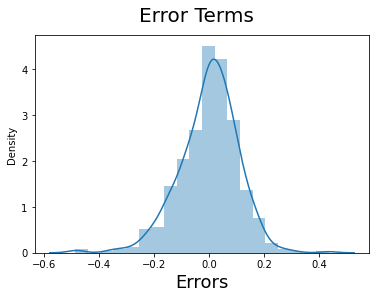

In [646]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [658]:
X_train_reg6.head()

,const,yr,windspeed,spring,winter,Partly_cloudy,low_rain,Sunday,Jan,Sep
653,1.0,1,0.300794,0,1,1,0,0,0,0
576,1.0,1,0.264686,0,0,1,0,0,0,0
426,1.0,1,0.255342,1,0,0,0,0,0,0
728,1.0,1,0.663106,1,0,1,0,1,0,0
482,1.0,1,0.188475,0,0,0,0,0,0,0


### Making Predictions

In [661]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


#### Dividing into X_test and y_test

In [662]:
y_test = df_test.pop('cnt')
X_test = df_test

In [663]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [664]:
# Making predictions
y_pred = lm_reg4.predict(X_test_new)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

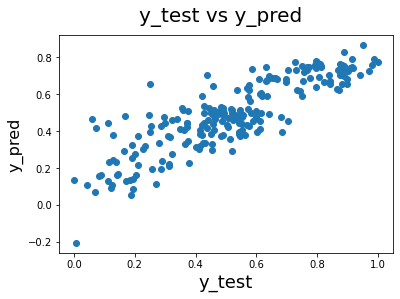

In [669]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


In [666]:
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.31e-154
Time:                        15:09:28   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4822      0.014     33.409      0.000       0.454       0.511
yr                0.2486      0.010     25.831      0.000       0.230       0.268
windspeed        -0.2032      0.029     -6.948      0.000      -0.261      -0.146
spring           -0.2368      0.014    -16.511      0.000      -0.265      -0.209
winter           -0.0546      0.012     -4.589      0.000      -0.078      -0.031
Partly_cloudy     0.0901      0.010      8.790      0.000       0.070       0.110
low_rain         -0.2089      0.030     -7.071      0.000      -0.267      -0.151
Sunday           -0.0465      0.014     -3.383      0.001      -0.074      -0.019
Jan              -0.1040      0.020     -5.097      0.000      -0.144      -0.064
Sep               0.0862      0.018      4.764      0.000       0.051       0.122
==============================================================================
Omnibus:                       47.207   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.456
Skew:                          -0.530   Prob(JB):                     2.53e-22
Kurtosis:                       4.886   Cond. No.                         9.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


We can see that the equation of our best fitted line is:

$ cnt = 0.4822 + 0.236 \times  yr - 0.2032 \times windspeed - 0.23 \times spring - 0.05 \times winter + 0.09 \times Partly_cloudy - 0.20 \times low_rain - 0.046 \times Sunday - 0.10 \times Jan + 0.086 \times Sep $


Overall we have a decent model, but we also acknowledge that we could do better. 


In [670]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7162808164291468